# Oppgave 2: Teste modellens troverdighet 

For at en språkmodell skal kunne benyttes til å ta over noe av menneskers arbeidsoppgaver, er modellens språklige evner nødt til å utad tilsvare et menneskets. Vi ønsket derfor å utforske om vår modell infrir dette kravet. For å gjennomføre en slik analyse benyttet vi oss av en lavterskel "Turingtest". Denne gikk ut på at vi valgte ut fire egenproduserte og ett modellprodusert sitat. Vi sendte så alle disse sitatene til en gruppe mennesker som skulle gjette hvilket av sitatene modellen hadde skrevet. Siden de nyeste språkmodellene angivelig har blitt bedre enn GPT2, ga vi modellen vår den fordelen at vi valgte dens mest troverdig sitat blant noen forsøk. Det var også viktig for oss å, i størst mulig grad, unngå bias i våre sitater for å hjelpe eller jobbe i mot modellen, så vi gjennomførte eksperimentet i rekkefølgen: bestemme tema, skrive egne sitater, velge sitat fra modellen, lese hverandres sitater. Grunnet modellens prestasjon på de ulike områdene, valgte vi å teste modellens egenskaper på promptet "Climate change is". 

Vi sendte ut skjemaet hvor sitat nummer $4$ var skrevet av modellen (se alle sitatene nederst i dette dokumentet). Resultatene fra de ulike individene adderte vi manuelt før vi la det inn i en python dictionary og videre i en pandas dataframe. Funnene er representert i et bar-plot.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
data = {"Før trening":[5,4,3,7,1]}
df_turing = pd.DataFrame(data=data, index = ["Human1" , "Human2" , "Human3", "Model", "Human4"])

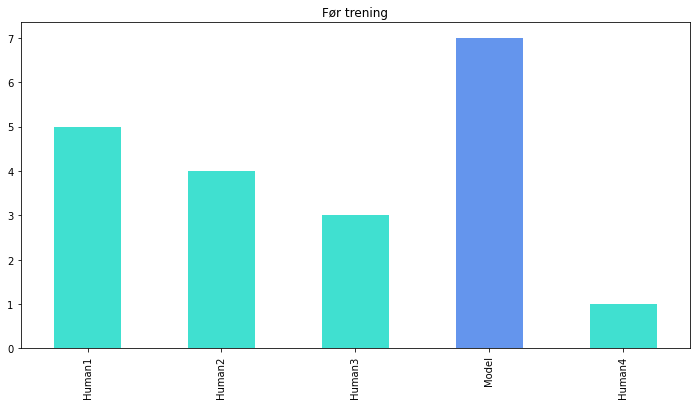

In [3]:
my_colors = ['turquoise', 'turquoise', 'turquoise', 'cornflowerblue', 'turquoise']

plt.figure(figsize=(12,6))
df_turing["Før trening"].plot.bar(color=my_colors)
plt.title("Før trening")
plt.savefig("Før_trening.png")
plt.show()

Her kan vi se at modellens sitat ble valgt oftere enn noen av de andre sitatene. Likevel er tilsynelatende andelen av riktige gjett ikke så stor. 

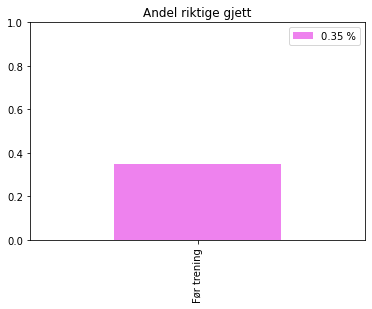

In [4]:
andel = lambda kol: df_turing.iloc[3][kol]/df_turing[kol].sum()

df_turing.loc["Andel riktig"] = [andel("Før trening")]

#Plotter:
df_turing.loc["Andel riktig"].plot.bar(color=["violet","darkviolet"], 
                                       label=f"{df_turing.loc['Andel riktig']['Før trening']:.2} %")
plt.title("Andel riktige gjett")
plt.ylim([0,1])
plt.savefig("Andel_før_trening.png")
plt.legend()
plt.show()

<br>
Til vår overraskelse var det altså ikke mer enn $34 \%$ av de $20$ forsøkspersonene som gjettet riktig. Dette er bedre enn den "perfekte" tilfeldige gjettingen med $20 \%$ på hver av kategoriene, men ikke med så veldig mye. Det er ikke urimelig å anta at med litt mer trening vil modellen kunne komme på et nivå hvor det å skille ut det modellproduserte sitatet er tilsvarende tilfeldige gjett. 

# Oppgave 3 

Selv om den forrige modellen presterete bedre enn forventet, ønsket vi å gjøre et forsøk på å trene modellen enda bedre. Vi ønsket først å finne noen datasett som var direkte knytte til klima, når kaggle sviktet oss på dette området, viste seg vanskelig å et skaffe et stort nok datasett uten omfattende kunnskap om scraping og mer datakraft. 

- ERIK: kanskje du kan legge inn noen av forsøkene våre her

Vi gikk til slutt over til å forsøke å gjøre det genrelle språket i modellen bedre. Det ble i denne prosessen også interessant å se på hvor mye de ulike datasettene påvirket modellen, og hvordan den forandret "personlighet" etter treningen.  

# Oppgave 4: Teste virkningen av finjusteringen 

In [5]:
df_turing = df_turing.drop('Andel riktig')

data_etter_trening = [6,2,2,9,1]
df_turing["Etter trening"] = data_etter_trening

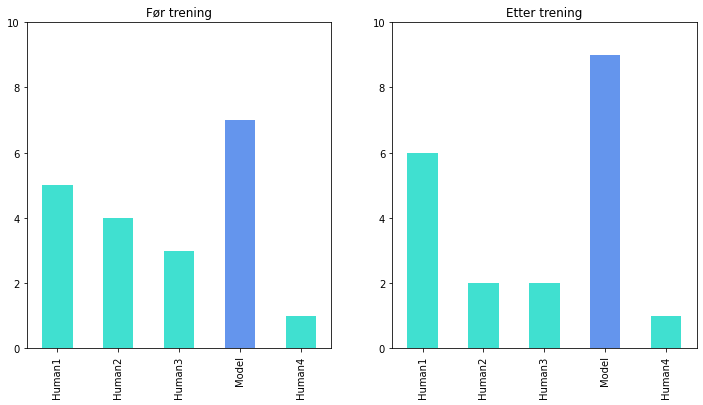

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df_turing["Før trening"].plot.bar(color=my_colors)
plt.title("Før trening")
plt.ylim([0,10])

plt.subplot(1,2,2)
df_turing["Etter trening"].plot.bar(color=my_colors)
plt.title("Etter trening")
plt.ylim([0,10])

plt.savefig("Begge.png")
plt.show()

KOMMENTER

Før trening      0.344080
Etter trening    0.440307
Name: Andel riktig, dtype: float64


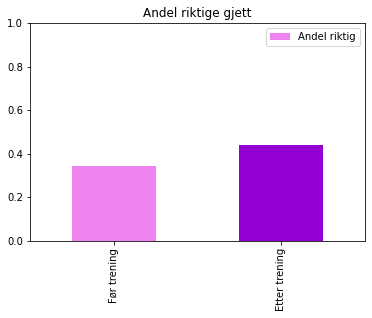

In [25]:
print(df_turing.loc["Andel riktig"])

df_turing.loc["Andel riktig"] = [andel("Før trening"),andel("Etter trening")]
df_turing.loc["Andel riktig"].plot.bar(color=["violet","darkviolet"])# , label=[f"{df_turing.loc['Andel riktig']['Før trening']:.2} %", f"{df_turing.loc['Andel riktig']['Etter trening']:.2} %"])
plt.title("Andel riktige gjett")
plt.ylim([0,1])
plt.legend()
plt.savefig("Andel_begge.png")
plt.show()

KOMMENTER

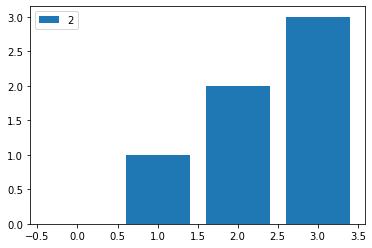

In [11]:
x = np.arange(4)
y = np.arange(4)
plt.bar(x,y)
plt.legend([1,2,3,4])
plt.legend([2])

### Skjema sendt ut før trening innelholdt disse utsagnene:

1. **HUMAN 1** Climate change is the biggest challenge for humanity in the next decade. To overcome it we must work together. This crisis arose due to an unlimited expansion in a limited environment – our planet. Consequently, humanity has managed to put a significant impact on the global climate. While the climate does change by itself, humanity has accelerated this pace immensely. The release of greenhouse gases has caused the poles to melt, and in effect, the water level is rising at an unprecedented rate, causing millions of people to flee from their homes and livelihoods. 

2. **HUMAN 2** Climate change is the emission of greenhouse gases and global warming. Climate change is our generation’s most prominent and crucial challenge. We are facing a situation where the solution requires drastic changes in the way we live our lives and what habits we have. It is crucial that we become less dependent on fossil fuels, and rather make greater investments in green energy. Extensive international cooperation is absolutely necessary to achieve the goals we have set ourselves, and for future generations to also enjoy the planet.



3. **HUMAN 3** Climate change is a dangerous pandemic, that has swept through the population the last 100 years. Though not a real pandemic, in the literary sense, the people’s mindset, that is the prelude to the actual climate change, has spread like wildfire throughout the globe, the last couple of centuries. As a result, as the ocean rises, as the forests burn down, as the crops dries out and as houses are destroyed by hurricanes, humans are driven from their homes. Thus, the climate change, is also a human change.



4. **MODEL** “Climate change is an issue that we know and will need to address”, said U.S. National Climate Assessment Director for Climate Change Science and Policy, Tom Waring. "The fact is that the amount of carbon dioxide released from this Earth's atmosphere has been increasing by about one-third over the last 50 years, and we must work together to mitigate that trend." To combat the problem, the U.S. and other developed nations are taking steps to regulate greenhouse gases as well.



5. **HUMAN 5** Climate change is our generation’s greatest crisis. To resolve this crisis, we must focus all our time and resources on changing our current way of life. We have to live more consciously and make better choices. Although many individuals are doing what they can to help this cause, the initiative from the people in charge is not nearly good enough. Greta Thuneberg said “I want you to act as if your house is on fire. Because it is.” 

### Skjema etter trening byttet ut utsagn fire fra skjema over med 
4. **MODEL** noe 